In [203]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [204]:
#first install the pymongo library for connect the python to mongodb
#through 'MongoClient' connect python to mongodb database

from pymongo import MongoClient
import pandas as pd                      #pandas is used for handled the data like collection means tables

gas_client=MongoClient('mongodb://localhost:27017/')  #address of mongodb it creates the connection to mongodb
database=gas_client['energy_project']           #mongodb store the data in database is energy project
gas_collection= database['gas_clean']   #collection means table in mongodb which i creating the collection name 'gas_clean' inside the database

print('Connected Successfully!')

Connected Successfully!


In [205]:
gas_collection.count_documents({})  # count all the document in the collection

13845

In [206]:
#take all documents  or data through mongodb
raw_gas_data=pd.DataFrame(list(gas_collection.find()))
raw_gas_data.head()  #shows first 5 columns  and rows

,_id,date,category,demand
0,692d759cfdd1ae40b8b6ad18,2018-01-01,All Networked Gas Customers,129.217691
1,692d759cfdd1ae40b8b6ad19,2018-01-04,Daily Metered (annual consumption >= 5.55 GWh ...,10.576218
2,692d759cfdd1ae40b8b6ad1a,2018-01-04,Large Daily Metered (annual metered capacity >...,13.310019
3,692d759cfdd1ae40b8b6ad1b,2018-01-04,Power Plants,96.651666
4,692d759cfdd1ae40b8b6ad1c,2018-01-02,All Networked Gas Customers,132.580714


In [207]:
#here remove mongodb ID through '.drop()' funcation
raw_gas_data.drop(
    columns=['_id'],
    inplace=True, 
    errors='ignore'
)
raw_gas_data.head()

,date,category,demand
0,2018-01-01,All Networked Gas Customers,129.217691
1,2018-01-04,Daily Metered (annual consumption >= 5.55 GWh ...,10.576218
2,2018-01-04,Large Daily Metered (annual metered capacity >...,13.310019
3,2018-01-04,Power Plants,96.651666
4,2018-01-02,All Networked Gas Customers,132.580714


In [208]:
raw_gas_data=raw_gas_data.drop_duplicates()  #remove duplicate values in my data through'.drop_duplicate()' funcation
print('rows after remove duplicates from data:',len(raw_gas_data))  # check the length of the data after removing duplicates

rows after remove duplicates from data: 13845


In [209]:
raw_gas_data= raw_gas_data.dropna(subset=['date',
                                          'category',
                                          'demand'
                                         ]
                                 )                      #remove all the missing values through'.dropna()' funcation 
print('rows after remove missing values from data:',len(raw_gas_data))

rows after remove missing values from data: 13845


In [235]:
#converting the date column into proper datetime through 'to.datetime()' funcation.
raw_gas_data["date"]=pd.to_datetime(
    raw_gas_data["date"],
    errors="coerce"                 # here panda find the wrong and invalid dates and replace with NaT(not a time )
)

#here will check for conversion 
print(raw_gas_data["date"].head())
print(raw_gas_data["date"].dtype) # here see the data types of columns through (.dtype()) funcation

0   2018-01-01
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-02
Name: date, dtype: datetime64[ns]
datetime64[ns]


In [236]:

raw_gas_data['year']=raw_gas_data['date'].dt.year  #here extract the year from the date column and also new column created called 'year' is created in the dataset
raw_gas_data['month']=raw_gas_data['date'].dt.month #here extract the month number from the date column and also created the new column 'month'
raw_gas_data.head()

,date,category,demand,year,month
0,2018-01-01,All Networked Gas Customers,129.217691,2018,1
1,2018-01-04,Daily Metered (annual consumption >= 5.55 GWh ...,10.576218,2018,1
2,2018-01-04,Large Daily Metered (annual metered capacity >...,13.310019,2018,1
3,2018-01-04,Power Plants,96.651666,2018,1
4,2018-01-02,All Networked Gas Customers,132.580714,2018,1


In [237]:
# here create a new dataset that takes only daily gas consumption data between the covid period (2019-2020)
coviddata_19_20=raw_gas_data[(
    raw_gas_data['year']>=2019) & (raw_gas_data['year']<=2020)]
coviddata_19_20.head()
coviddata_19_20.tail()

,date,category,demand,year,month
5490,2020-12-31,Daily Metered (annual consumption >= 5.55 GWh ...,9.795127,2020,12
5491,2020-12-30,Power Plants,129.517501,2020,12
5492,2020-12-31,Non-Daily Metered (annual consumption < 5.55 GWh),70.711611,2020,12
5493,2020-12-31,Large Daily Metered (annual metered capacity >...,10.490155,2020,12
5496,2020-12-31,All Networked Gas Customers,175.821893,2020,12


In [238]:
coviddata_19_20['month_name']=coviddata_19_20['date'].dt.strftime('%B') # here create the new column 'month_name' and use the '.dt.strftime(%B)' for converts the date into the full month name
coviddata_19_20['weekday']=coviddata_19_20['date'].dt.strftime('%A') #  here create the new column 'weekday' and use the '.dt.strftime(%A)' for extracts the day of the week
coviddata_19_20['week']=coviddata_19_20['date'].dt.isocalendar().week # here create the new column 'week' and use the '.dt.isocalendar().week' gives the week number of the year like(1-52) based on the ISO standard
coviddata_19_20.head()

C:\Users\dives\AppData\Local\Temp\ipykernel_30856\267851019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coviddata_19_20['month_name']=coviddata_19_20['date'].dt.strftime('%B') # here create the new column 'month_name' and use the '.dt.strftime(%B)' for converts the date into the full month name
C:\Users\dives\AppData\Local\Temp\ipykernel_30856\267851019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coviddata_19_20['weekday']=coviddata_19_20['date'].dt.strftime('%A') #  here create the new colu

,date,category,demand,year,month,month_name,weekday,week
1815,2019-01-02,Non-Daily Metered (annual consumption < 5.55 GWh),50.312132,2019,1,January,Wednesday,1
1817,2019-01-02,Daily Metered (annual consumption >= 5.55 GWh ...,10.371686,2019,1,January,Wednesday,1
1818,2019-01-02,Large Daily Metered (annual metered capacity >...,12.207111,2019,1,January,Wednesday,1
1819,2019-01-02,All Networked Gas Customers,175.577595,2019,1,January,Wednesday,1
1820,2019-01-02,Power Plants,102.686666,2019,1,January,Wednesday,1


In [239]:
# here saved cleaned covid gas consumption  gas data into mongodb 
from pymongo import MongoClient
clean_records=coviddata_19_20.to_dict('records')  # here convert cleaned pandas Dataframe into a list of dictionaries
gas_client=MongoClient('mongodb://localhost:27017/')
database=gas_client['energy_project']                # database name
clean_data_collection=database['gas_clean_processed'] # this is new collection where clean data stored.
clean_data_collection.insert_many(clean_records)   # inser all rows of cleaned dataset in mongodb at once.
print('now clean dataset successfully saved to mongodb!')

now clean dataset successfully saved to mongodb!


In [240]:
clean_data_collection.count_documents({}) # here show how many documents inside the ne collection

25585

In [241]:
coviddata_19_20.info()  # '.info()' funcation gives a summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, 1815 to 5496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3655 non-null   datetime64[ns]
 1   category    3655 non-null   object        
 2   demand      3655 non-null   float64       
 3   year        3655 non-null   int32         
 4   month       3655 non-null   int32         
 5   month_name  3655 non-null   object        
 6   weekday     3655 non-null   object        
 7   week        3655 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 217.7+ KB


In [242]:
coviddata_19_20.describe() 

,date,demand,year,month,week
count,3655,3655.000000,3655.000000,3655.000000,3655.0
mean,2020-01-01 00:00:00.000000256,63.394461,2019.500684,6.519836,26.679891
min,2019-01-01 00:00:00,5.150731,2019.000000,1.000000,1.0
25%,2019-07-02 00:00:00,12.989743,2019.000000,4.000000,14.0
50%,2020-01-01 00:00:00,32.448597,2020.000000,7.000000,27.0
75%,2020-07-02 00:00:00,112.856667,2020.000000,10.000000,40.0
max,2020-12-31 00:00:00,228.108935,2020.000000,12.000000,53.0
std,NaN,59.551760,0.500068,3.450023,15.076756


In [243]:
coviddata_19_20['category'].value_counts()  #'.value_counts()' it counts how many times unique values comes in a column

category
Non-Daily Metered (annual consumption < 5.55 GWh)                731
Daily Metered (annual consumption >= 5.55 GWh and < 57.5 GWh)    731
Large Daily Metered (annual metered capacity >= 57.5 GWh)        731
All Networked Gas Customers                                      731
Power Plants                                                     731
Name: count, dtype: int64

In [246]:
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib is used to creat the graphs and charts
import seaborn as sns   # and  here seaborn hepls to create more attractive, smmother and cleaner charts

plt.style.use('seaborn-v0_8') # it's a new seaborn style to suppoet matplotlib, makes graphs look professional and cleaner.

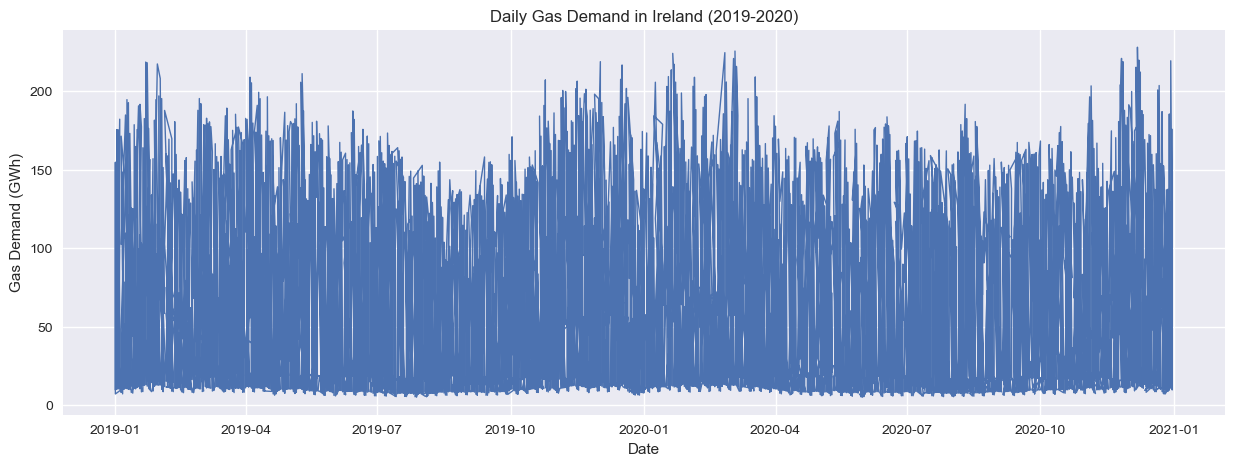

In [247]:
# trend of daily gas demand

plt.figure(figsize=(15,5))   # here give the graph width and height size.
plt.plot(                     # draw a line graph,x axis shows date and y axis shows demand.
    coviddata_19_20['date'],
    coviddata_19_20['demand'],
    linewidth=1                  # here gives thickness of the line    
)
plt.title('Daily Gas Demand in Ireland (2019-2020)')  # here gives the title name top of the chart.
plt.xlabel('Date')                                     #gives x axis label name
plt.ylabel('Gas Demand (GWh)')                          #gives y axis label name
plt.show()                                               # display a graph

In [ ]:
'''The output of the line chart displays Ireland daily gas demand (GWh) from 2019 to 2020. The daily gas demand shows the strong fluctuation. 
Each and every point represents gas consumption for every single day throughout the two years. We can see that higher demand is clearly seen 
during winters (2019-10) and (2020-10) and the lower demands during summer (2019-04) and (2019 -04) this pattern shows a seasonal dependency
of gas consumption in Ireland.'''


C:\Users\dives\AppData\Local\Temp\ipykernel_30856\1238123037.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(                      # here shows bar plot


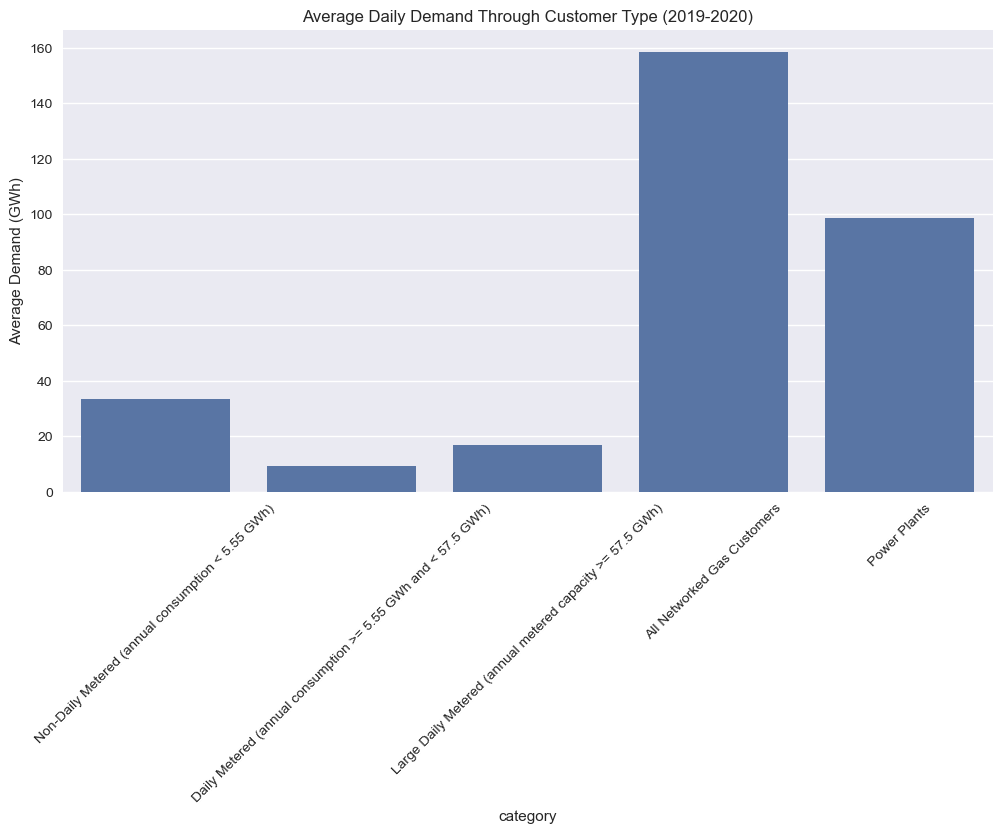

In [248]:
#compare customer type means average demand per customer category

plt.figure(figsize=(12,6))
sns.barplot(                      # here shows bar plot
    data=coviddata_19_20,
    x='category',
    y='demand',
    ci=None        # ci means confidence intervel used for seaborn plots it used to do not show error bar on the chart.
)
plt.title('Average Daily Demand Through Customer Type (2019-2020)')
plt.xticks(rotation=45)               # rotate the x axis lable name 45 degree
plt.ylabel('Average Demand (GWh)')
plt.show()

In [ ]:
'''The output of the average daily demand by customer type shows that all network gas customers show the highest average demand. Power plants are the
second largest daily gas consumers, whereas daily metered and non-daily metered customers consume significantly less gas, while large daily customers
show moderate but consistent demand. This highlights that large scale consumers dominate overall gas usage.'''


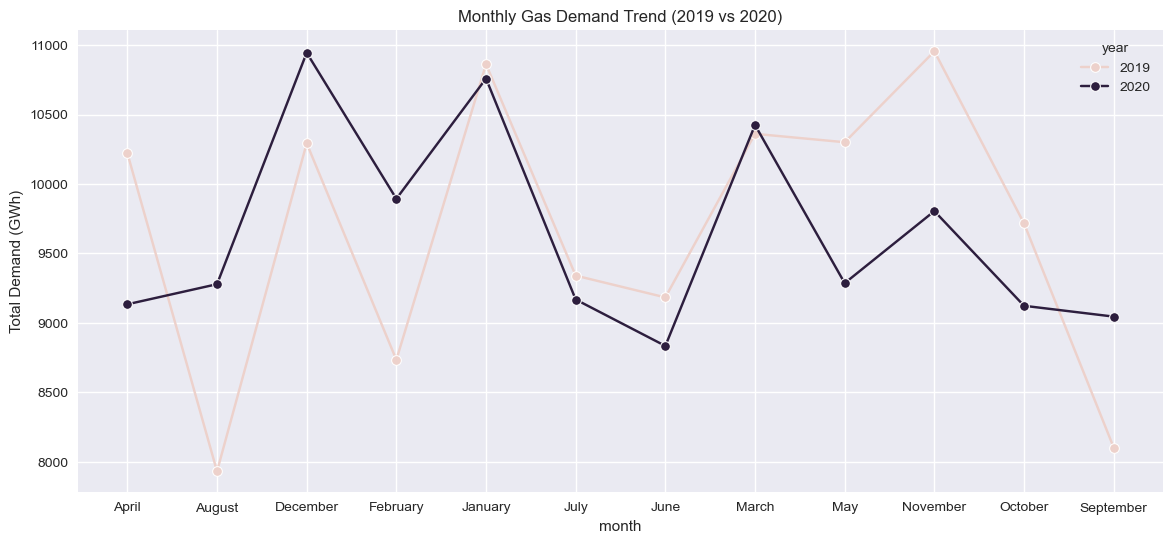

In [249]:
#Monthly gas demand trend

monthly_gas_demand=coviddata_19_20.groupby(                       # group the year and month_name column also add the total demand
    ['year','month_name'])['demand'].sum().reset_index()  # '.reset_index()' convert grouped result back in the data frame

plt.figure(figsize=(14,6))
sns.lineplot(                        # here created the line plot
    data=monthly_gas_demand, 
    x='month_name',
    y='demand',
    hue='year',                    # draw seprate line for both year.
    marker='o'                      #draw circle dots on each month for highlighting the points.
)
plt.title('Monthly Gas Demand Trend (2019 vs 2020)')
plt.xlabel('month')
plt.ylabel('Total Demand (GWh)')
plt.show()

In [ ]:
'''Monthly gas demand trend of (2019 vs 2020) of both years, which shows the similar seasonal trends that pick during the colder months.
Winter month, such as January, November and December shows the highest demand in both years where as summer months shows lower gas usage.
2020 follows the similar pattern to 2019 with some variations likely impact by early COVID effects.'''


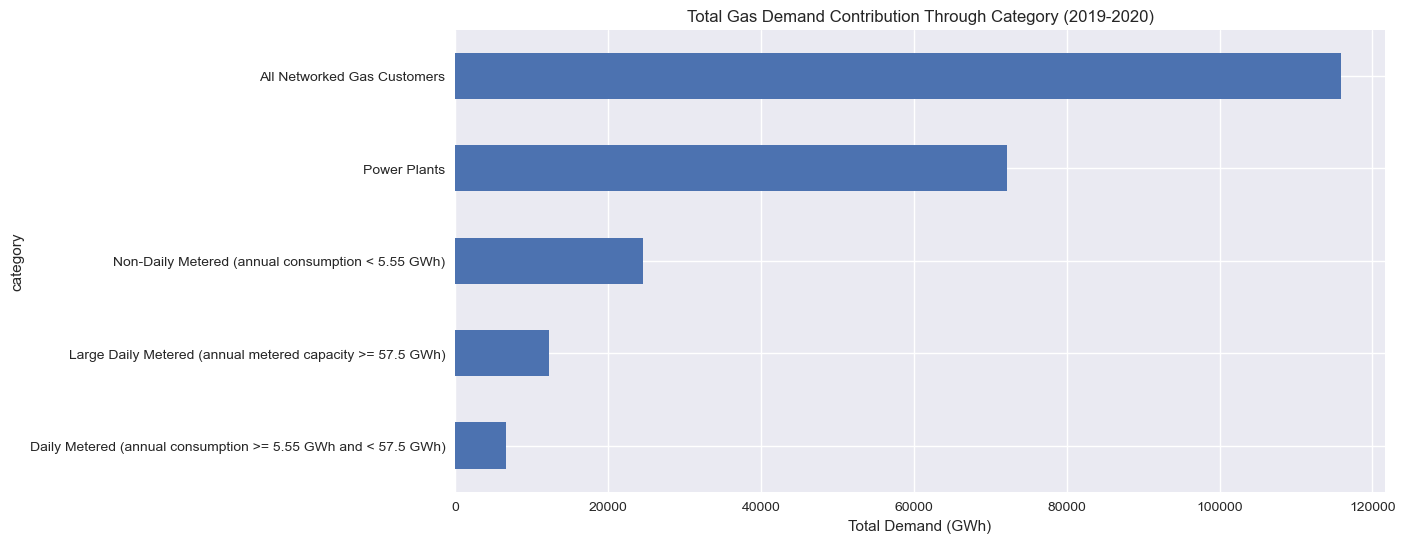

In [251]:
#which category contributes the most
#total demand with the help of category
# here make the group of category and demand column and sort values smallest to largest.
total_through_category=coviddata_19_20.groupby('category')['demand'].sum().sort_values()

plt.figure(figsize=(12,6))
total_through_category.plot(kind='barh')  #'.plot(kind='barh')' make a horizontal graph
plt.title('Total Gas Demand Contribution Through Category (2019-2020)')
plt.xlabel('Total Demand (GWh)')
plt.show()

In [ ]:
'''The total gas consumption calculates across 2019 to 2020 for each customer category. From the output, we can see that all network gas customers
contribute the highest of total demand, whereas PowerPoint contribute to the second last to total consumption and the smaller customer categories 
share less amount of total demand of gas consumption. So, this tell that a few sectors are responsible for most gas demand.'''


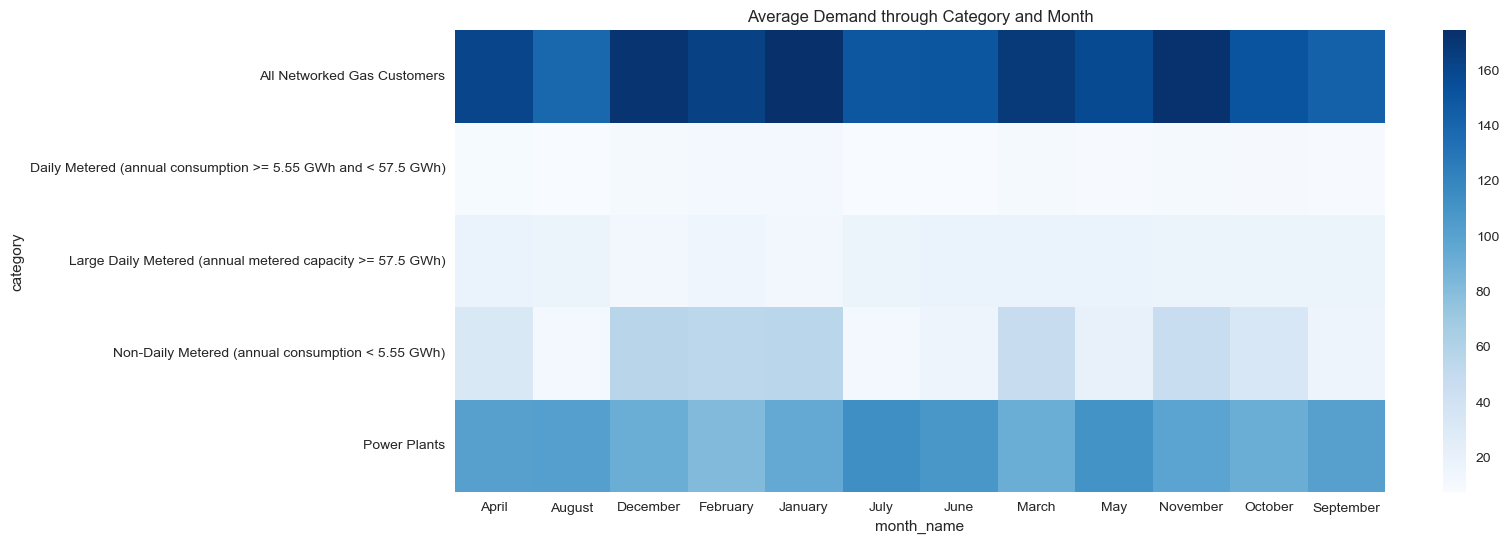

In [252]:
#heatmap
#category vs month
#here create the pivot table
category_vs_month=coviddata_19_20.pivot_table(values='demand',
                                             index='category',
                                             columns='month_name',
                                             aggfunc='mean'           #average(mean)
                                             )
plt.figure(figsize=(15,6))
sns.heatmap(                                 #draw the heatmap
    category_vs_month,
    annot=False,                            # donot show the numbers inside the box
    cmap='Blues'                           # give the colour for heatmap
)
plt.title('Average Demand through Category and Month')
plt.show()

In [ ]:
'''Heat map is used for category versus month where we can see. Dark colors show the high demand during winter months over main category types.
where we can see the power plans and network customers shows continuous high usage throughout the year. light colors show low demand.
The heat map clearly visualize the seasonal category wise variation.'''


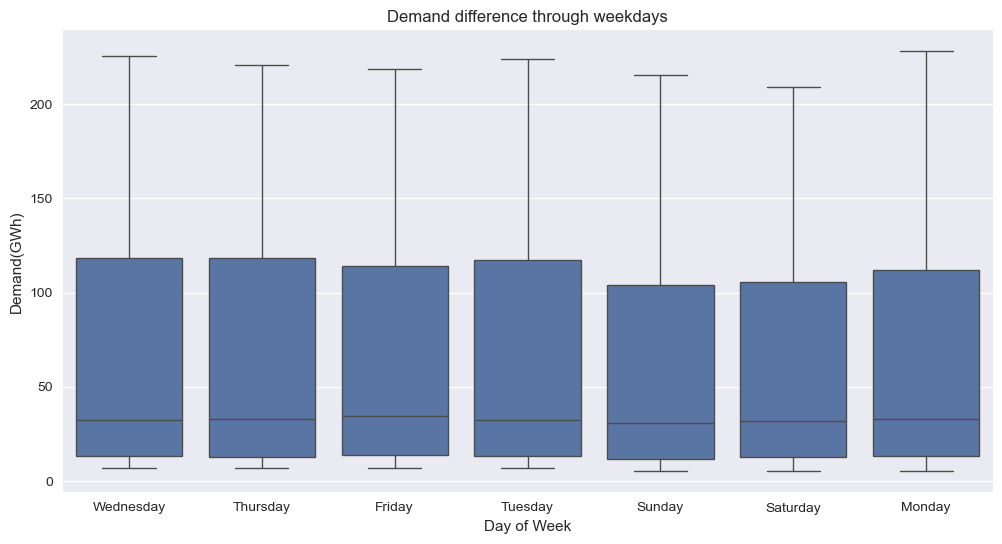

In [253]:
#Gas consumption by weekday

plt.figure(figsize=(12,6))
sns.boxplot(                        #create the box plot
    data=coviddata_19_20, 
    x='weekday',
    y='demand'
)
plt.title('Demand difference through weekdays')
plt.xlabel('Day of Week')
plt.ylabel('Demand(GWh)')
plt.show()

In [ ]:
'''This shows the distribution of gas demand over different days of the week. The gas remains consistent over weekdays. It’s rightly lower demand 
on weekdays, especially for Sunday and Saturday. This tells that industrial and commercial impact the daily demand.'''


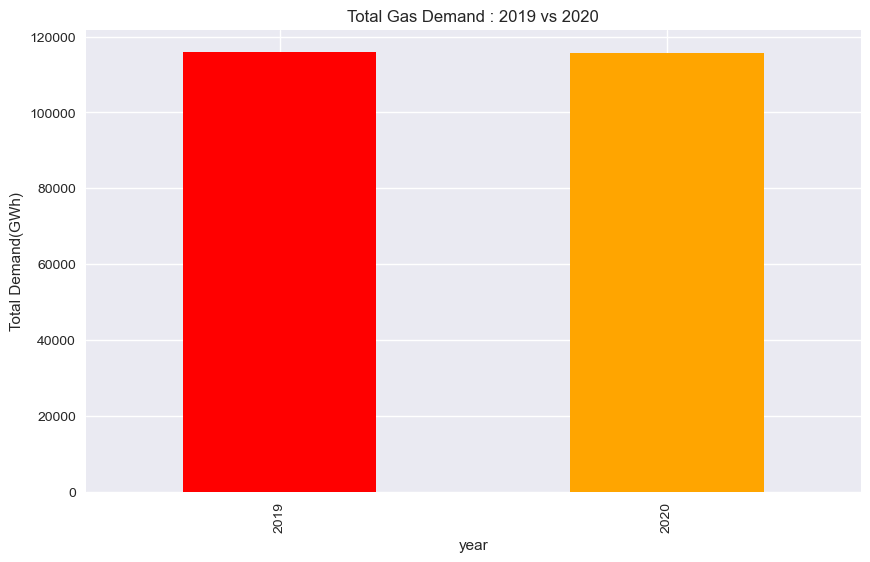

In [254]:
#Total demand per year
#here group the two colums year and demand
yearly_gas_demand=coviddata_19_20.groupby('year')['demand'].sum()

plt.figure(figsize=(10,6))
yearly_gas_demand.plot(
    kind='bar',                     #make a bar chart
    color=['red','orange']        # give the colour for both year.
)
plt.title('Total Gas Demand : 2019 vs 2020')
plt.ylabel('Total Demand(GWh)')
plt.show()

In [ ]:
'''The output of the total gas demand shows the total gas demand in 2019 and 2020 is very similar. As there is no major decline seen in 2020, 
which tells that pre-Covid demand is stable. This supports the use of 2019-2020 as a dependable baseline period.'''


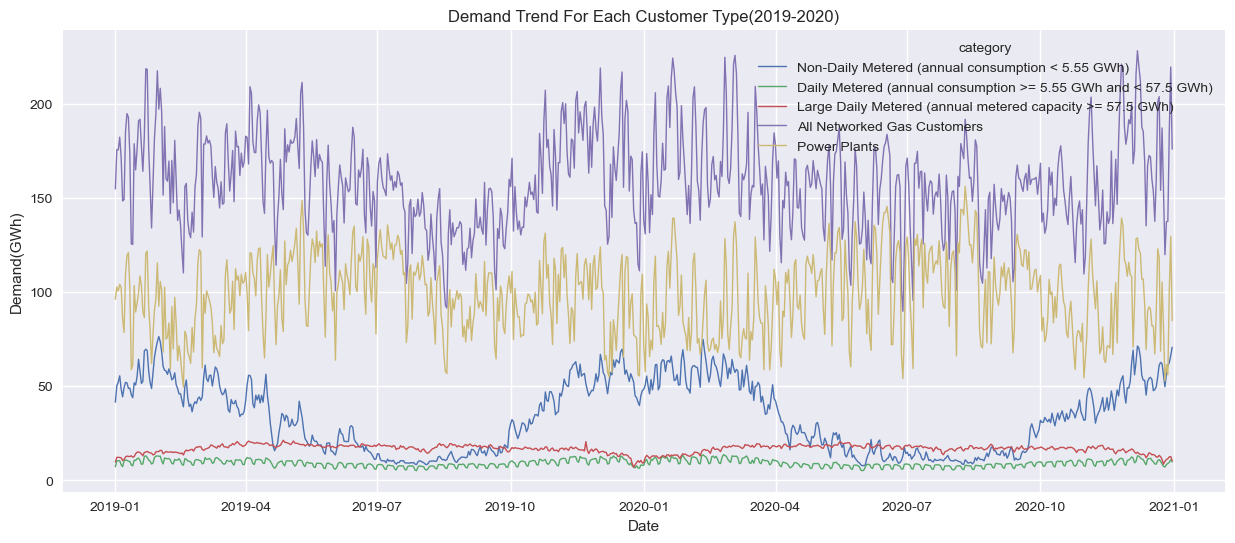

In [255]:
#category trend  line plot

plt.figure(figsize=(15,6))
sns.lineplot(                    #create the line graph
    data=coviddata_19_20,
    x='date',                  # x axis show the date column
    y='demand',                 # y axis show the demand column
    hue='category',      #draw seperate line for eac category type
    linewidth=1         # here gives the line thickness
)
plt.title('Demand Trend For Each Customer Type(2019-2020)')
plt.xlabel('Date')
plt.ylabel('Demand(GWh)')
plt.show()

In [ ]:
'''The output of the daily demand train for each customer type shows that the all-customer types show clear seasonal fluctuation.
The power plants and networked customers shows higher inconsistency. Daily metered and non-daily metered customer category shows 
the stable and low demand.'''


In [257]:
time_series_data=coviddata_19_20.groupby('date')['demand'].sum() # group two columns date and demand
time_series_data=time_series_data.asfreq('D')             #'.asfreq('D')' makes the data daily frequency

In [258]:
# here build ARIMA Model for overall data

from statsmodels.tsa.arima.model import ARIMA       #import the ARIMA model

arima_model=ARIMA(time_series_data, order=(2,1,2))
arima_model_results=arima_model.fit() # fit the arima model

C:\Users\dives\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [259]:
#Forecasting for next 31 days
arima_forecast_steps=31
arima_forecast_values=arima_model_results.forecast(steps=arima_forecast_steps)

In [261]:
#here created daily future dates.
jan_dates=pd.date_range(
    start=time_series_data.index[-1]+pd.Timedelta(days=1),
    periods=arima_forecast_steps,
    freq='D'
)

In [262]:
#now put data into clean DataFrame
#create the datframe that stores ARIMA forecast results wit their dates

arima_forecast_df=pd.DataFrame({
    'date':jan_dates,                         #forecast dates.
    'forecast_demand':arima_forecast_values # forecasted demand values from ARIMA
})
full_arima_series= pd.concat([time_series_data])   # here merge the series and dataframe to make one final time series.


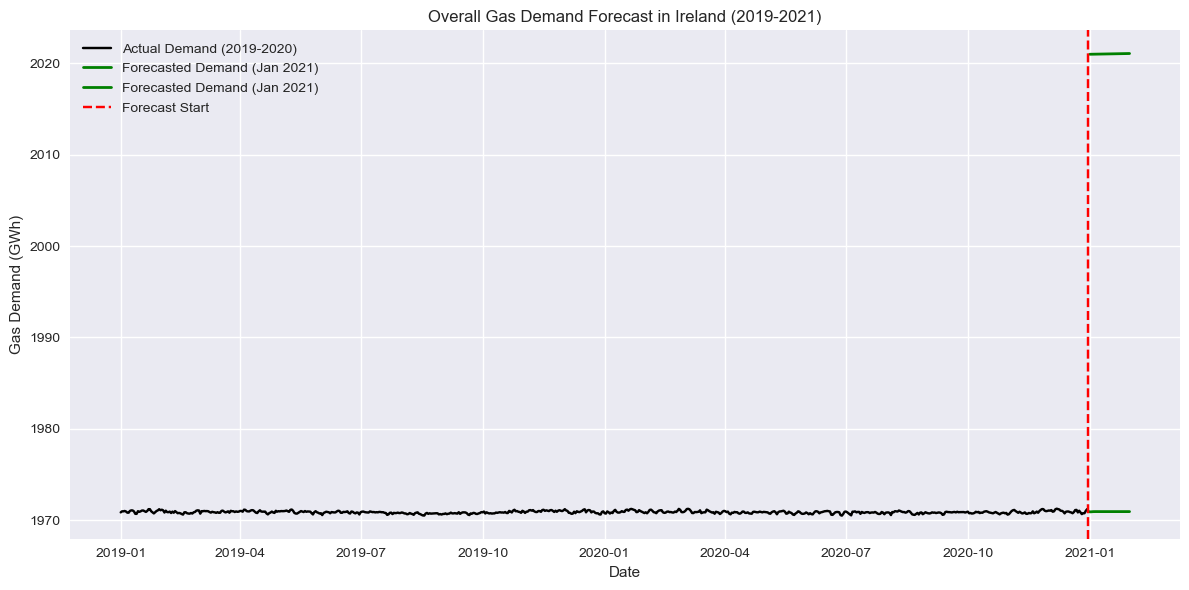

In [233]:
#here show plot from 2019 to jan 2021

plt.figure(figsize=(12,6))
plt.plot(                           #Actual data
    time_series_data.index,
    time_series_data.values,
    label='Actual Demand (2019-2020)',
    color='black'
)
plt.plot(                                #Forecasted data
    arima_forecast_df.index,
    arima_forecast_df.values,
    label='Forecasted Demand (Jan 2021)',
    color='green',
    linewidth=2
)
plt.axvline(               #draw a vertical line for plot
    x=time_series_data.index[-1],
    color='red',
    linestyle='--',
    label='Forecast Start'
)
plt.title('Overall Gas Demand Forecast in Ireland (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Gas Demand (GWh)')
plt.legend()
plt.tight_layout()
plt.show()

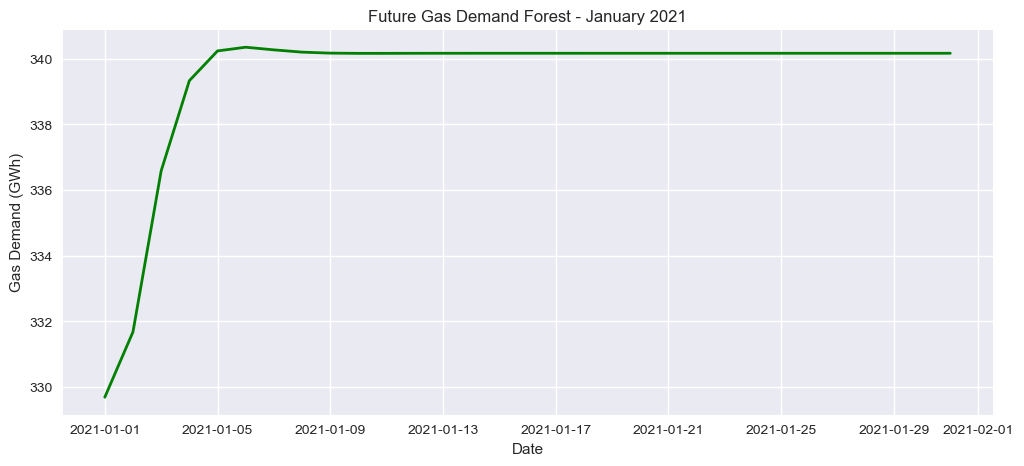

In [263]:
# here only show the jan month 2021 future prediction
plt.figure(figsize=(12,5))
plt.plot(
    arima_forecast_df['date'],
    arima_forecast_df['forecast_demand'],
    color='green',
    linewidth=2
)
plt.title('Future Gas Demand Forest - January 2021')
plt.xlabel('Date')
plt.ylabel('Gas Demand (GWh)')
plt.grid(True)
plt.show()

In [265]:
'''The output of the forecast shows the overall gas demand with the help of Arima model, which provide a stable gas demand for January 2021.
The forecast follows the past average values without extreme fluctuations. Where the output shows forecast stable after initial days. 
The straight-line behaviour in the output shows the Arima smoothing nature. This tells the expected continuous demand in the short term. 
Where is the Arima focus on Trend and seasonality.'''

'The output of the forecast shows the overall gas demand with the help of Arima model, which provide a stable gas demand for January 2021.\nThe forecast follows the past average values without extreme fluctuations. Where the output shows forecast stable after initial days. \nThe straight-line behaviour in the output shows the Arima smoothing nature. This tells the expected continuous demand in the short term. \nWhere is the Arima focus on Trend and seasonality.'